In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [18]:
data=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

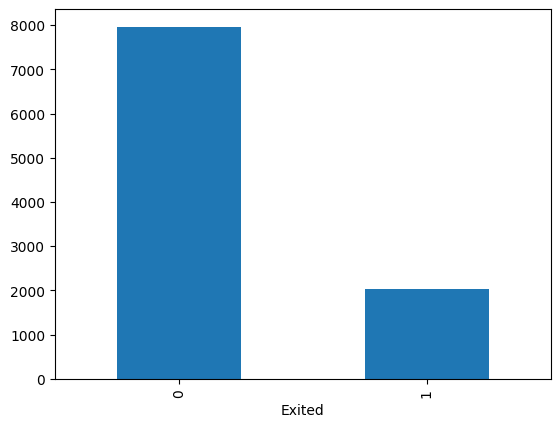

In [20]:
data["Exited"].value_counts().plot(kind="bar")

In [21]:
#drop unnecessary data
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
#encode non-numerical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data["Geography"]=encoder.fit_transform(data["Geography"])
data["Gender"]=encoder.fit_transform(data["Gender"])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#convert all types to float
data=data.astype(np.float64)
data.dtypes

CreditScore        float64
Geography          float64
Gender             float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [24]:
from sklearn.model_selection import train_test_split

y=data["Exited"].to_list()
X=data.drop(columns=["Exited"])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [26]:
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

## Model 1: Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
Model_1=LogisticRegression()
Model_1.fit(X_train, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
# Test data results
Model_1_preds=Model_1.predict(X_test)
print(f"Accuracy score= {accuracy_score(y_test, Model_1_preds)}")
print(f"Classification report Model_1: {classification_report(y_test, Model_1_preds)}")

Accuracy score= 0.8005
Classification report Model_1:               precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1607
         1.0       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



## Model 2: Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
Model_2=RandomForestClassifier()
Model_2.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
Model_2_preds=Model_2.predict(X_test)
print(f"Accuracy score= {accuracy_score(y_test, Model_2_preds)}")
print(f"Classification report Model_1: {classification_report(y_test, Model_2_preds)}")

Accuracy score= 0.863
Classification report Model_1:               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



## Model 3: Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
Model_3=GradientBoostingClassifier()
Model_3.fit(X_train, y_train)

GradientBoostingClassifier()

In [34]:
Model_3_preds=Model_3.predict(X_test)
print(f"Accuracy score= {accuracy_score(y_test, Model_3_preds)}")
print(f"Classification report Model_1: {classification_report(y_test, Model_3_preds)}")

Accuracy score= 0.8655
Classification report Model_1:               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## Comparing All models

In [41]:
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [42]:
model_1_results=calculate_results(y_test, Model_1_preds)
model_2_results=calculate_results(y_test, Model_2_preds)
model_3_results=calculate_results(y_test, Model_3_preds)

In [43]:
# Combine model results into a dataframe
combined_results = pd.DataFrame({"Model 1 (Logistic Regression)": model_1_results,
                                  "Model 2 (Decision Tree Classifier)": model_2_results,
                                  "Model 3 (Gradient Boosting Classifier)": model_3_results})
combined_results = combined_results.transpose()
combined_results

,accuracy,precision,recall,f1
Model 1 (Logistic Regression),0.8005,0.740912,0.8005,0.737248
Model 2 (Decision Tree Classifier),0.8630,0.853027,0.8630,0.849441
Model 3 (Gradient Boosting Classifier),0.8655,0.856047,0.8655,0.852749


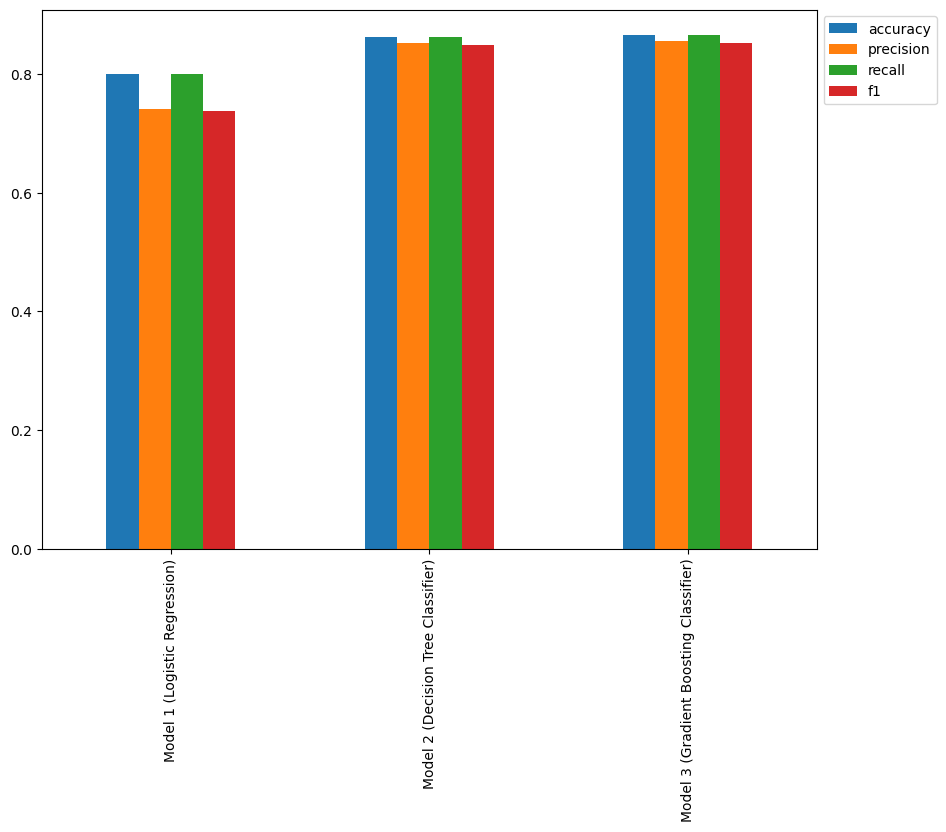

In [44]:
# Plot results comparison
combined_results["accuracy"] = combined_results["accuracy"]
combined_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));